In [2]:
import pandas as pd
import numpy as np
import os
import regex as re
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [4]:
df = pd.read_csv("../insects_or_not.csv")
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace("\n", "")
df['text'] = df['text'].str.replace("\[.*?\]", "")
df['text'] = df['text'].str.replace("({|})+", "")
df['text'] = df['text'].str.replace("https?://S+|www\.\S+", "")
# tfidf
vec = TfidfVectorizer()
x = vec.fit_transform(df['text'])

/tmp/ipykernel_74220/1971789257.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("\[.*?\]", "")
/tmp/ipykernel_74220/1971789257.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("({|})+", "")
/tmp/ipykernel_74220/1971789257.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("https?://S+|www\.\S+", "")


In [5]:
# svd (réduction de données)
svd = TruncatedSVD(n_components=100)
res = svd.fit_transform(x)
#print(svd.explained_variance_)
# res.shape = (221, 100)

In [72]:
# prep data
X = res
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [73]:
#clf = RandomForestClassifier(max_depth=7, max_features="log2", min_samples_split=10, n_estimators=500)
clf = LinearSVC(C=1.0, tol=0.001, random_state=42, loss="hinge")

In [74]:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

     insects       0.91      1.00      0.95        29
 non-insects       1.00      0.92      0.96        38

    accuracy                           0.96        67
   macro avg       0.95      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



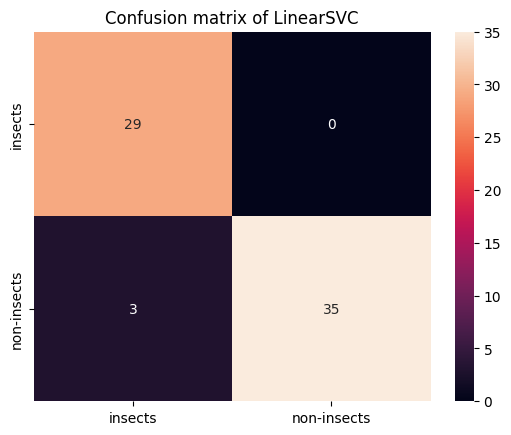

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
c_matrix = sns.heatmap(cm, annot=True, fmt='d', xticklabels=["insects","non-insects"], yticklabels=["insects","non-insects"]).set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers
plt.title("Confusion matrix of LinearSVC")
print(classification_report(y_test,y_pred))

In [77]:
matrix_fig = c_matrix.get_figure()
matrix_fig.savefig("confusion_matrix.png")

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9552238805970149


In [191]:
params = {
    "penalty":["l2"],
    "loss":["squared_hinge", "hinge"],
    "max_iter": np.arange(400, 1200, 100),
    "C": np.arange(0.1, 0.5, 0.05)

}

In [192]:
search = HalvingGridSearchCV(clf, params, resource='n_samples',
                             factor=2,
                             random_state=0,
                            n_jobs=-1).fit(X, y)

In [78]:
search.best_estimator_

NameError: name 'search' is not defined

In [194]:
best_clf = search.best_estimator_
#best_clf = best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

In [195]:
print(search.best_estimator_)

LinearSVC(C=0.20000000000000004, max_iter=1100)


In [196]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8656716417910447
